# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [20]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut =  20
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) 

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(37.529, 39.959]    21537
(39.959, 42.389]    20532
(35.099, 37.529]    20221
(42.389, 44.819]    19818
(30.238, 32.668]    19730
(27.808, 30.238]    19095
(32.668, 35.099]    18700
(44.819, 47.249]    17660
(52.11, 54.54]      17485
(54.54, 56.97]      16830
(47.249, 49.679]    16651
(49.679, 52.11]     16059
(56.97, 59.4]       15820
(59.4, 61.83]       14856
(25.378, 27.808]    14032
(61.83, 64.26]      12829
(22.948, 25.378]     9626
(64.26, 66.69]       8524
(20.469, 22.948]     4053
(66.69, 69.121]      3453
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.378, 27.808]"
1,0,16765,45.931507,"(44.819, 47.249]"
2,0,19046,52.180822,"(52.11, 54.54]"
3,0,19005,52.068493,"(49.679, 52.11]"
4,0,19932,54.608219,"(54.54, 56.97]"


In [44]:
#year_group_sorted = age_data['YEARS_BINNED'].value_counts().sort_index()
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())
print(year_group_sorted)
len(year_group_sorted)

[Interval(20.469, 22.948, closed='right')
 Interval(22.948, 25.378, closed='right')
 Interval(25.378, 27.808, closed='right')
 Interval(27.808, 30.238, closed='right')
 Interval(30.238, 32.668, closed='right')
 Interval(32.668, 35.099, closed='right')
 Interval(35.099, 37.529, closed='right')
 Interval(37.529, 39.959, closed='right')
 Interval(39.959, 42.389, closed='right')
 Interval(42.389, 44.819, closed='right')
 Interval(44.819, 47.249, closed='right')
 Interval(47.249, 49.679, closed='right')
 Interval(49.679, 52.11, closed='right')
 Interval(52.11, 54.54, closed='right')
 Interval(54.54, 56.97, closed='right')
 Interval(56.97, 59.4, closed='right')
 Interval(59.4, 61.83, closed='right')
 Interval(61.83, 64.26, closed='right')
 Interval(64.26, 66.69, closed='right')
 Interval(66.69, 69.121, closed='right')]


20

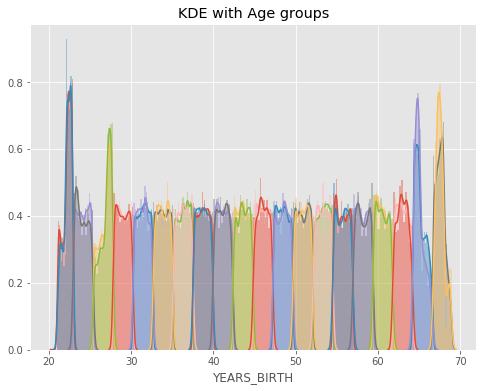

In [47]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & 
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & 
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')

plt.show()

In [23]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.469, 22.948]",0.130027,8098.827535,22.188569
"(22.948, 25.378]",0.118637,8819.737066,24.163663
"(25.378, 27.808]",0.109963,9779.814781,26.794013
"(27.808, 30.238]",0.112438,10586.092066,29.002992
"(30.238, 32.668]",0.104511,11483.724734,31.462260
"(32.668, 35.099]",0.099144,12367.493850,33.883545
"(35.099, 37.529]",0.094704,13267.492162,36.349294
"(37.529, 39.959]",0.084552,14140.553559,38.741243
"(39.959, 42.389]",0.080265,15024.533752,41.163106


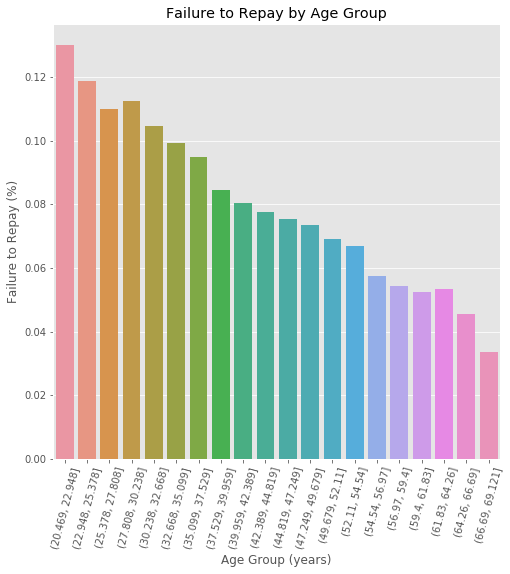

In [31]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_groups.index
py = age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');